<a href="https://colab.research.google.com/github/cstepgit/Clustering-California-homes/blob/main/clusteringv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the uploaded file to inspect its content
file_path = 'housing.csv'
housing_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
housing_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<ipython-input-2-bc7df7a7f15b>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].median(), inplace=True)


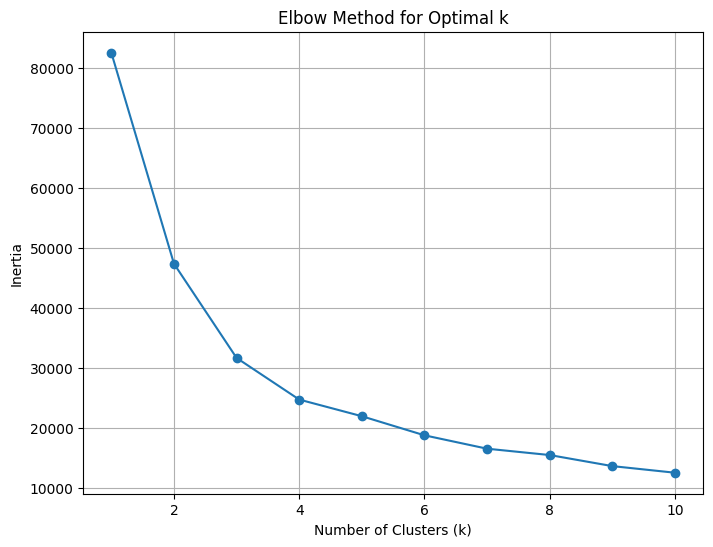

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].median(), inplace=True)

features = housing_data[['longitude', 'latitude', 'median_income', 'median_house_value']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


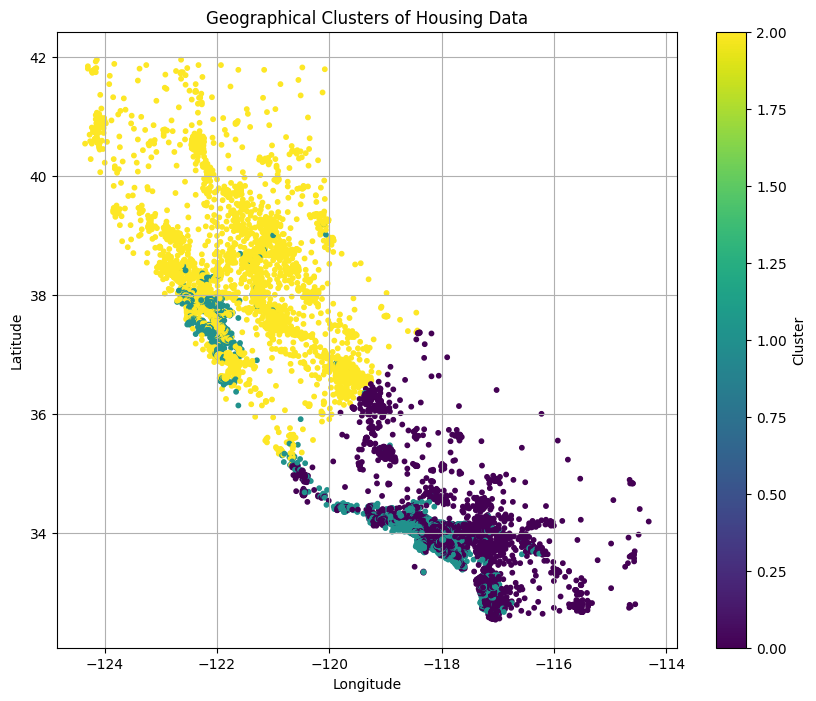

In [ ]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

# Apply KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
housing_data['cluster'] = kmeans.fit_predict(data_scaled)

# Visualize the clusters based on geographical coordinates (longitude, latitude)
plt.figure(figsize=(10, 8))
plt.scatter(
    housing_data['longitude'],
    housing_data['latitude'],
    c=housing_data['cluster'],
    cmap='viridis',
    s=10
)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Clusters of Housing Data')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Calculate silhouette score to evaluate clustering performance
silhouette_avg = silhouette_score(data_scaled, housing_data['cluster'])

# Summary of clustering performance
cluster_counts = housing_data['cluster'].value_counts()


print(f"Silhouette Score: {silhouette_avg}")
print("Cluster Counts:")
print(cluster_counts)

Silhouette Score: 0.45282911579026014
Cluster Counts:
cluster
0    9759
2    7633
1    3248
Name: count, dtype: int64


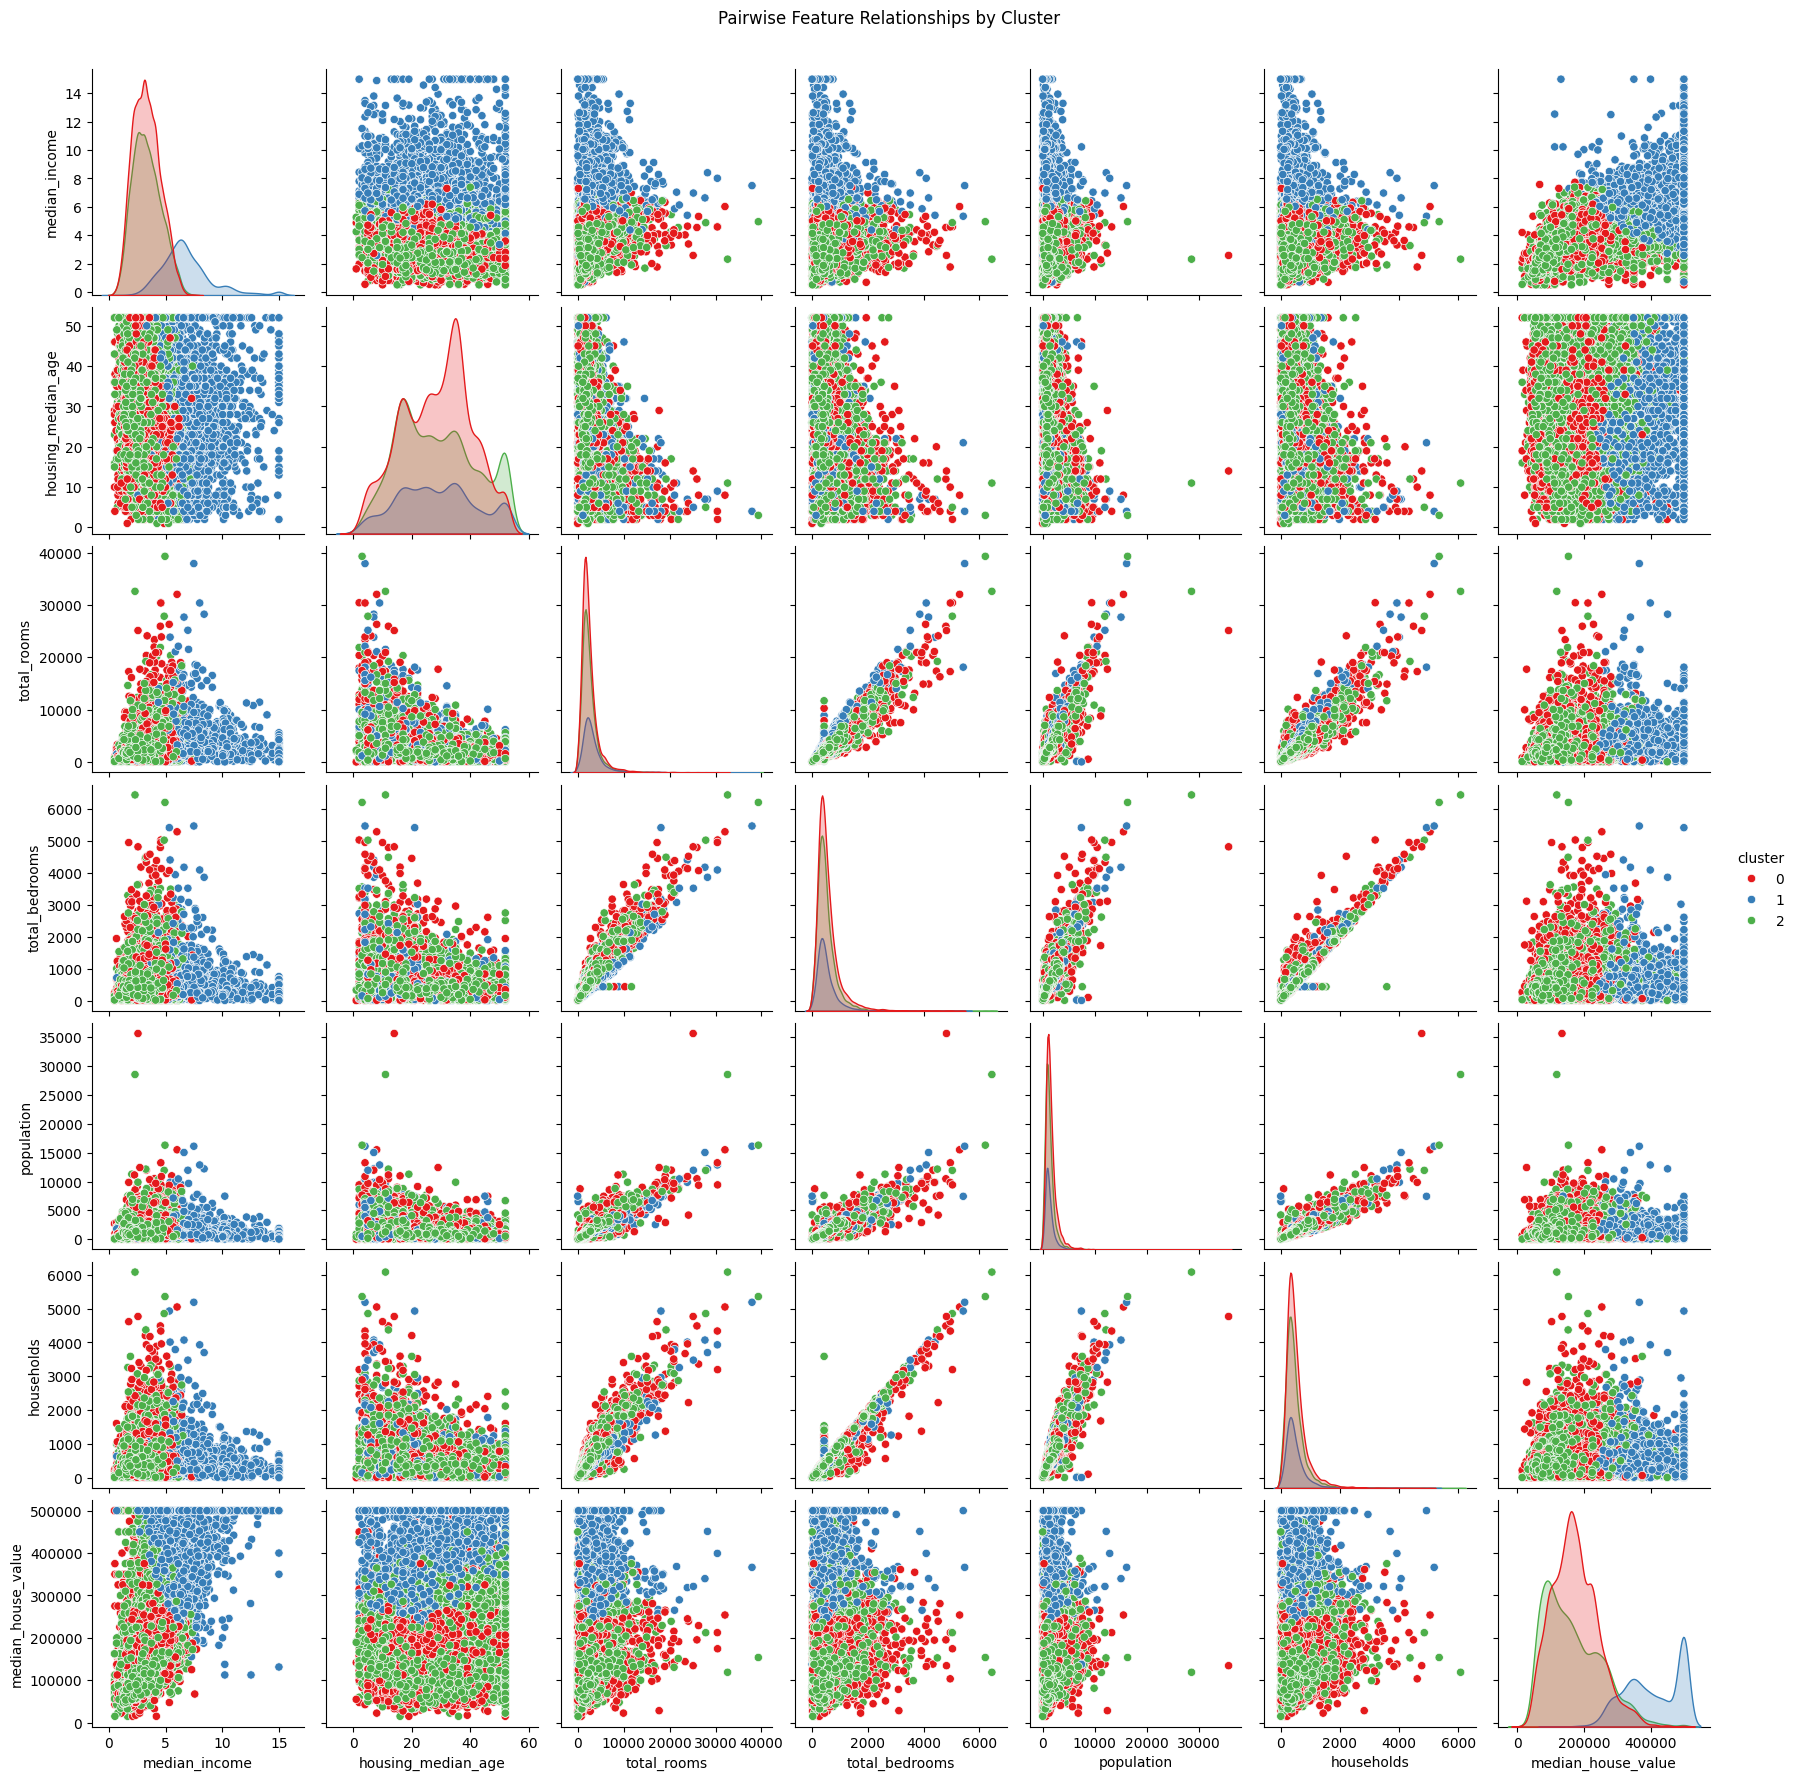

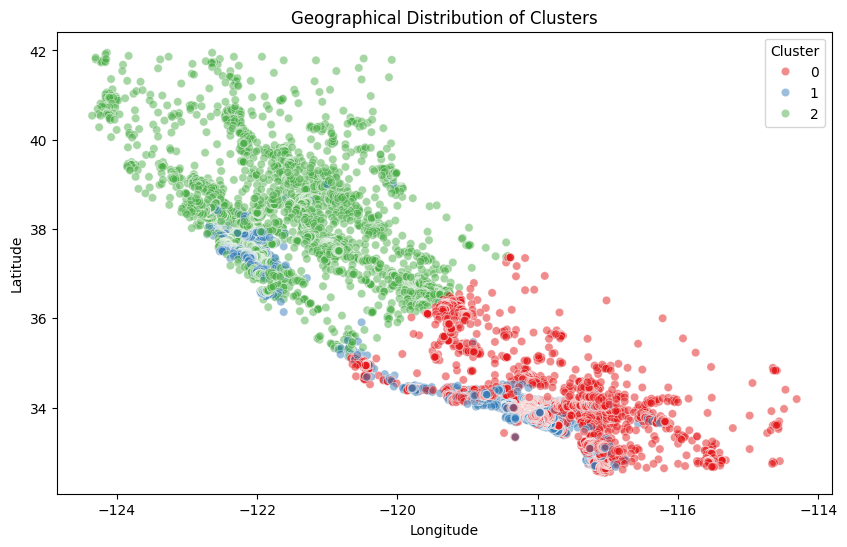

In [ ]:
import seaborn as sns

# Visualizations
sns.pairplot(housing_data, vars=["median_income", "housing_median_age", "total_rooms",
                                        "total_bedrooms", "population", "households", "median_house_value"],
             hue='cluster', palette='Set1', diag_kind='kde')
plt.suptitle("Pairwise Feature Relationships by Cluster", y=1.02)
plt.show()


# Geographical Distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=housing_data, palette='Set1', alpha=0.5)
plt.title('Geographical Distribution of Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()




This clustering alg did relativley well. With a silhouette score of .4 the data is grouped nicley and decently seperated. Futhermore, using kmeans and picking a k of 3 based on the elbow method resulted in better clustering.

Based on the graphs and plots, I believe it clustered as follows.

Cluster 0 (red): wealthy, new suburban or upscale areas

Cluter 1 (blue): moderate-income, well-established neighborhoods

Cluster 2 (green) : lower-income, dense population and old urban housing.